In [1]:

# ======================================
# LIBRETA DE PROCESAMIENTO BÁSICO - OBSIPY
# Curso de Sismología
# ======================================

# ---- Celda 1: Importar módulos necesarios ----
import matplotlib.pyplot as plt
import numpy as np
from obspy import read
from obspy.signal.tf_misfit import plot_tfr


IU.PAYG.00.BH1 | 2017-09-08T04:51:02.019536Z - 2017-09-08T05:23:01.969536Z | 20.0 Hz, 38400 samples


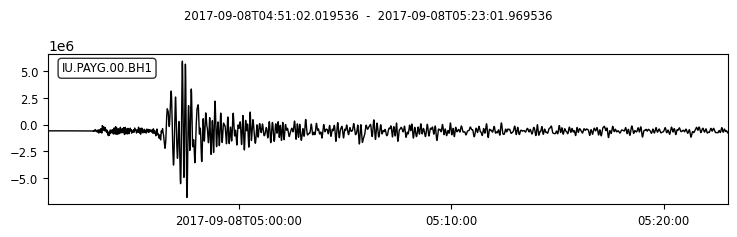

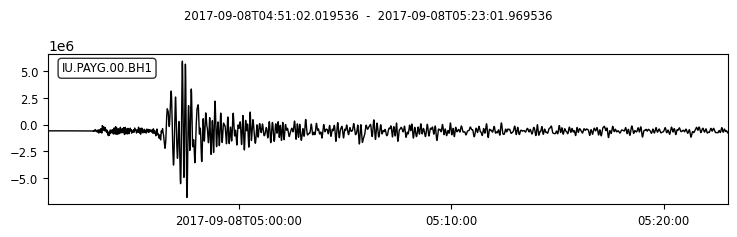

In [9]:

# ---- Celda 2: Leer sismograma ----
# Cambiar la ruta del archivo según el sismograma descargado
# Ejemplo: "20250101.mseed" o cualquier archivo .sac / .mseed
st = read("2017-09-08-mww81-near-coast-of-chiapas-mexico-1.miniseed")
tr = st[0]  # Seleccionamos la primera traza si hay más

print(tr)
tr.plot()  # Visualización rápida con obspy


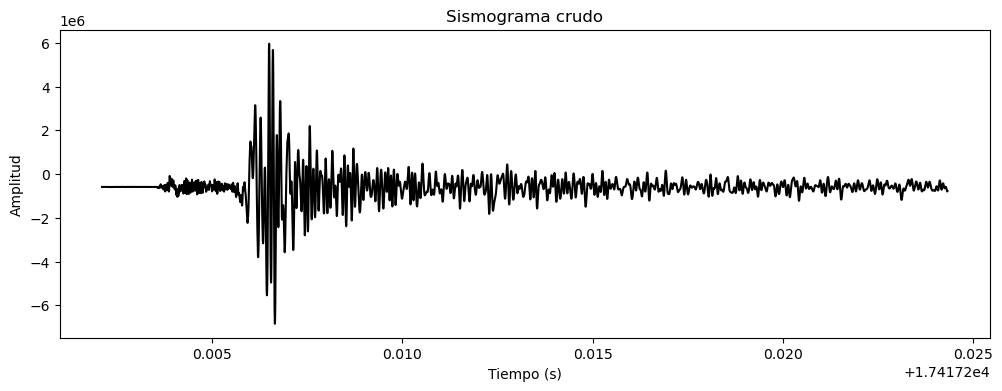

In [10]:

# ---- Celda 3: Graficar el sismograma crudo ----
plt.figure(figsize=(12,4))
plt.plot(tr.times("matplotlib"), tr.data, color="black")
plt.title("Sismograma crudo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()


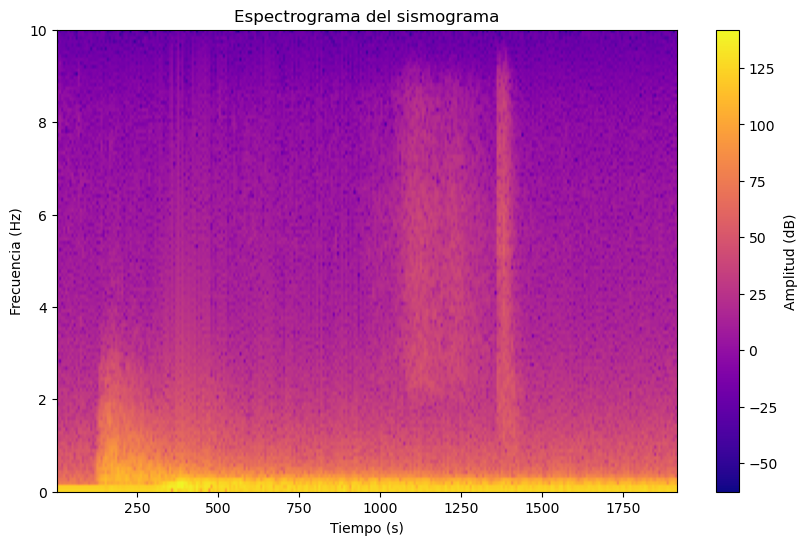

In [11]:

# ---- Celda 4: Espectrograma ----
# Usamos matplotlib directamente para ver el contenido espectral
plt.figure(figsize=(10,6))
plt.specgram(tr.data, NFFT=256, Fs=tr.stats.sampling_rate, cmap="plasma")
plt.title("Espectrograma del sismograma")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.colorbar(label="Amplitud (dB)")
plt.show()


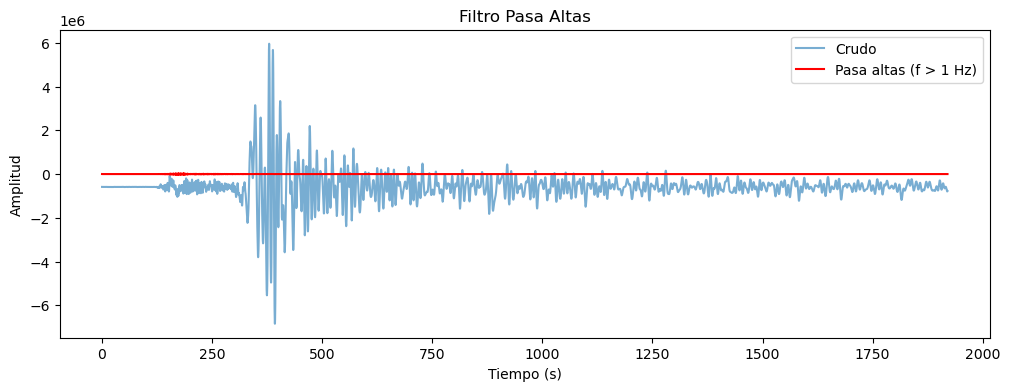

In [12]:

# ---- Celda 5: Filtro pasa altas ----
tr_hp = tr.copy()
tr_hp.detrend("linear")
tr_hp.filter("highpass", freq=1.0)  # cambiar freq según se necesite

plt.figure(figsize=(12,4))
plt.plot(tr.times(), tr.data, label="Crudo", alpha=0.6)
plt.plot(tr_hp.times(), tr_hp.data, label="Pasa altas (f > 1 Hz)", color="red")
plt.title("Filtro Pasa Altas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


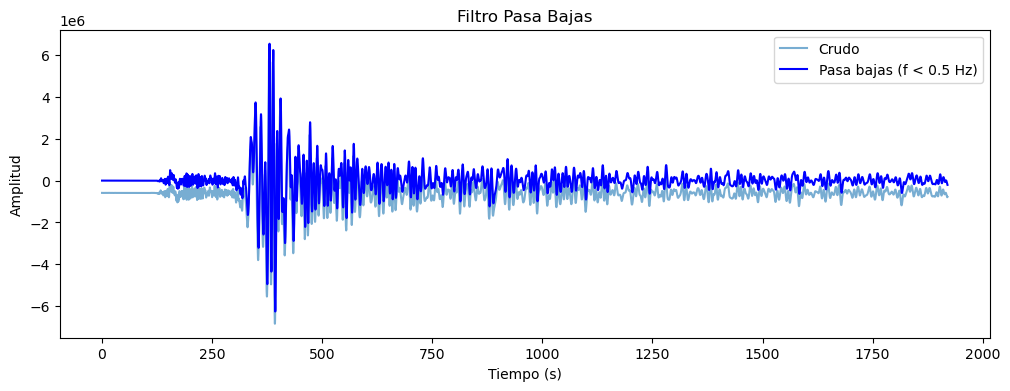

In [13]:

# ---- Celda 6: Filtro pasa bajas ----
tr_lp = tr.copy()
tr_lp.detrend("linear")
tr_lp.filter("lowpass", freq=0.5)  # cambiar freq según se necesite

plt.figure(figsize=(12,4))
plt.plot(tr.times(), tr.data, label="Crudo", alpha=0.6)
plt.plot(tr_lp.times(), tr_lp.data, label="Pasa bajas (f < 0.5 Hz)", color="blue")
plt.title("Filtro Pasa Bajas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()


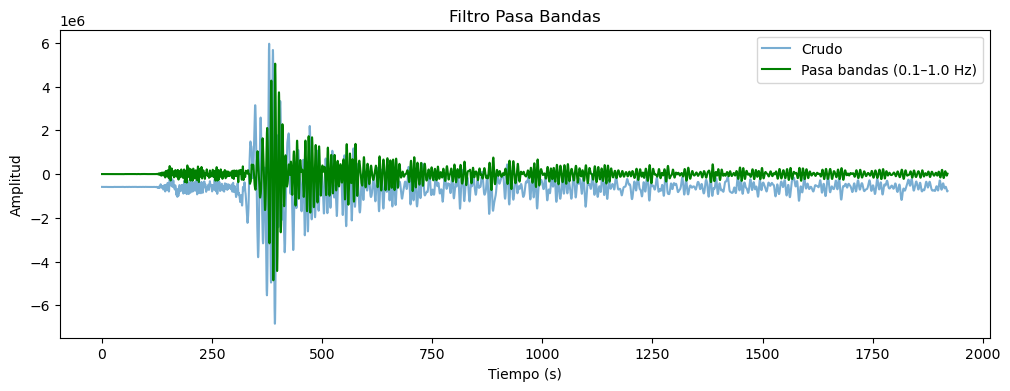

In [14]:

# ---- Celda 7: Filtro pasa bandas ----
tr_bp = tr.copy()
tr_bp.detrend("linear")
tr_bp.filter("bandpass", freqmin=0.1, freqmax=1.0)  # ajustar banda según interés

plt.figure(figsize=(12,4))
plt.plot(tr.times(), tr.data, label="Crudo", alpha=0.6)
plt.plot(tr_bp.times(), tr_bp.data, label="Pasa bandas (0.1–1.0 Hz)", color="green")
plt.title("Filtro Pasa Bandas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()
